# Exercice 2

## 2.A

In [168]:
#Structure de données pour représenter un multigraphe par sa matrice d'adjacence
import numpy as np
import copy
import time
import matplotlib.pyplot as plt

class matriceadj :
  #Nous allons initialiser la matrice 
  def __init__(self,taille):
    self.taille = taille
    self.adjMatrice = np.zeros((taille,taille))
    self.ens_sommets = [] # car à cause de la contraction un sommet en représentera plusieurs 
    for i in range (taille):
        self.ens_sommets.append([i])
  #On ajoute les arêtes
  def ajout_arete(self,u,v):
    self.adjMatrice[u,v] +=1
    self.adjMatrice[v,u] += 1


#Fonction qui réalise la contraction 
#Contraction : Programmer simplement la suppression de l'arête donnée en entrée
#Entrées de la fonction : G  multigraphe représenté par sa matrice d'adjacence et e une arête
def contraction(Matrix,u,v,Sommet):
    M = copy.deepcopy(Matrix)
    S = copy.deepcopy(Sommet)
    M[v] = M[u]+M[v]
    M[:,v]=M[:,u]+M[:,v]
    M[v,v]=0 #Si c'est une boucle, on s'en fou un petit peu car cela n'aura aucun impact pour notre algo on applique donc le remove self loops 
    M = np.delete(M,u,0)
    M = np.delete(M,u,1)
    new_sommets = S[v]
    for s in (new_sommets):
        S[u].append(s)
    S.pop(v)
    return M,S

import random as rd
def tirage_arête(Matrix):
    u = rd.randint(0,len(Matrix)-1)
    v = rd.randint(0,len(Matrix)-1)
    while(u==v or Matrix[u,v]==0):
        u = rd.randint(0,len(Matrix)-1)
        v = rd.randint(0,len(Matrix)-1)
    return u,v

def karger(Matrix,sommet): 
    m=copy.deepcopy(Matrix)
    u,v = tirage_arête(m)
    #print("\nL'arête tirée est entre les sommets:",u,v)
    m,s = contraction(m,u,v,sommet)
    #print("Les sommets du graphe apres la contraction :",s)
    #print("La matrice d'adjacence apres la contraction :\n",m)
    while(len(m)>2):
        u,v = tirage_arête(m)
     #   print("\nL'arête tirée est entre les sommets :",u,v)
        m,s = contraction(m,u,v,s)
       # print("La matrice d'adjacence apres la contraction :\n",m)
      #  print("Les sommets du graphe apres la contraction :",s)
    return m,s 



In [165]:
#Test
g = Graph(4)
g.ajout_arete(0, 1)
g.ajout_arete(0, 2)
g.ajout_arete(0, 3)
g.ajout_arete(1, 3)
g.ajout_arete(2, 3)
vertices = g.ens_sommets
m = g.adjMatrice
print("La matrice d'adjacence initiale : \n",m)
print(karger(m,vertices))

La matrice d'adjacence initiale : 
 [[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]]
(array([[0., 3.],
       [3., 0.]]), [[0, 1, 3], [2]])


In [169]:
#Cycle a n sommets 
def mat_cycle(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    matrix = matriceadj(taille)#Pour initialiser ma matrice 
    matrix.ajout_arete(0,taille-1)
    for i in range(taille-1):
        matrix.ajout_arete(i,i+1)
    return matrix

#Graphe complet a n sommets 
def mat_complet(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    matrix = matriceadj(taille)#Pour initialiser ma matrice 
    #Comme tous les sommets du graphe sont reliés entre eux, toutes les cases de la matrice d'adjacence sont à 1, sauf la diagonale (pas de boucle)
    for i in range(taille):
        for j in range(taille):
            if j!= i and i <j:#pour ajouter qu'une seule arête entre chaque sommets et éviter les boucles
                matrix.ajout_arete(i,j)
    return matrix

#Graphe biparti complet n = 2k
def mat_bicomplet(taille):
    if (taille % 2 == 0):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice ) qui doit être pair
        matrix = matriceadj(taille)#Pour initialiser ma matrice
        for i in range(taille //2):
            for j in range(taille//2,taille):
                matrix.ajout_arete(i,j)
        return matrix
#Graphes aléatoires à n sommets où une arête est ajoutée à E avec une proba p
def mat_alea(size, p):
    mat = matriceadj(size)
    for i in range(size):
        for j in range(size):
            if(i<j):#pour ajouter qu'une seule arête entre chaque sommets
                _p = np.random.uniform(0,1)#tirage aléatoire de la proba
                if(_p < p):
                    mat.ajout_arete(i,j)
    return mat




In [170]:
#On commence par fixer nos graphes 
K5 = mat_complet(5).adjMatrice
s5 = mat_complet(5).ens_sommets

K33 = mat_bicomplet(6).adjMatrice
s33 = mat_bicomplet(6).ens_sommets

proba1 = 0
proba2 = 0
for i in range(100):
    m,s = karger(K5,s5)
    if m[0,1] == 4:
        proba1 +=1
    mbis,sbis = karger(K33,s33)
    if mbis[0,1] == 3:
        proba2 +=1
    
print("Proba de succès pour un complet de taille 5",proba1/100)
print("Proba de succès pour un biparti complet K33",proba2/100)

Proba de succès pour un complet de taille 5 0.53
Proba de succès pour un biparti complet K33 0.42


### Exemple de généralisation dans le cas d'un graphe biparti

[0.1, 0.04, 0.02, 0.04, 0.04, 0.06, 0.06, 0.08, 0.02, 0.04]
[0.0008163265306122449, 0.0005649717514124294, 0.00041407867494824016, 0.00031645569620253165, 0.00020202020202020202, 0.00016680567139282736, 0.00014005602240896358, 0.00011926058437686345, 0.00010277492291880781, 8.94854586129754e-05]


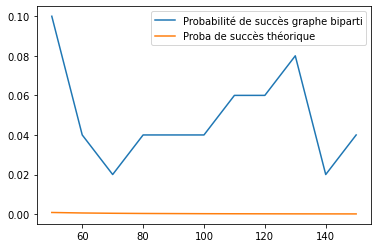

In [172]:
#On sait que pour un graphe biparti, la taille d'une coupe minimale 
#est égale au cardinal minimum des deux sous ensembles
#Étant donné que nous travaillons avec des tailles paires, alors 
#taille d'une coupe minimale = taille du biparti // 2
tailles = [50,60,70,80,100,110,120,130,140,150]
proba1 = []

for i in tailles:
    biparti = mat_bicomplet(i).adjMatrice
    sommetbi = mat_bicomplet(i).ens_sommets
    p1 = 0

    for j in range(50):
        m,s = karger(biparti,sommetbi)
        if m[0,1] == i //2:
            p1+=1
    proba1.append(p1/50)

print(proba1)
plt.plot(tailles,proba1, label='Probabilité de succès graphe biparti')
ref = [2/((i-1)*i) for i in tailles]
print(ref)
plt.plot(tailles,ref, label='Proba de succès théorique')



plt.legend()
plt.savefig('Question 2.A.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.B

Implémenter l'algorithme de Karger itéré (représentation par matrice d'adjacence)

In [143]:
def karger_itere(Matrix,sommet,t):
    m_min = 1000
    for i in range(t):
        s_opt = sommet
        mat_opt = Matrix
        #print("\n - Execution n°",i+1,"de l'algorithme de Karger")
        mat,s=karger(Matrix,sommet)
        m=mat[0][1] #Car quoiqu'il arrive la taille de la matrice d'adjacence sera 2x2 et diagonale
        if (m<m_min):
            s_opt=s
            m_min=m
        mat_opt=mat
        #print("Le cardinal de la coupe est m=",m)
        #print("-----------------------------------------------------------------")
    #print("Le cardinal de la coupe minimum est : ",m_min)
    return mat_opt,s_opt




In [122]:
#Test de Karger itéré
#g = Graph(4)
#g.ajout_arete(0, 1)
#g.ajout_arete(0, 2)
#g.ajout_arete(0, 3)
#g.ajout_arete(1, 3)
#g.ajout_arete(2, 3)
#vertices = g.ens_sommets
#m = g.adjMatrice
#print("La matrice d'adjacence initiale : \n",m)
#print(karger_itere(m,vertices,100))

La matrice d'adjacence initiale : 
 [[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]]

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 3.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 3.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 3.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 3.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 7 de l'alg

### Étude expérimentale de Karger Itéré

Commençons par faire l'analyse expérimentale de la complexité de Karger itéré

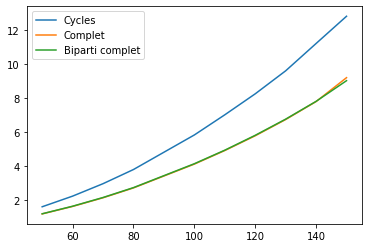

In [173]:
#On réalise notre étude expérimentale de la complexité sur différentes tailles n croissantes
tailles = [50,60,70,80,100,110,120,130,140,150]
T = [10,20,30,40,50,60,70]
temps1 = []
temps2 = []
temps3 = []

for i in tailles :
    t1 = 0
    t2 = 0
    t3 = 0
   
    for j in T : #On réitère plusieurs fois afin d'obtenir un temps moyen 
        m1 = mat_cycle(i).adjMatrice
        s1 = mat_cycle(i).ens_sommets
        m2 = mat_complet(i).adjMatrice
        s2 = mat_complet(i).ens_sommets
        m3 = mat_bicomplet(i).adjMatrice
        s3 = mat_bicomplet(i).ens_sommets
    
        
        debut = time.time()
        karger_itere(m1,s1,j)
        end = time.time()
        t1 += end - debut
        
        debut = time.time()
        karger_itere(m2,s2,j)
        end = time.time()
        t2 += end - debut
        
        start = time.time()
        karger_itere(m3,s3,j)
        end = time.time()
        t3 += end - start
        
        
    
    temps1.append(np.mean(t1))
    temps2.append(np.mean(t2))
    temps3.append(np.mean(t3))

complexite = [i**4 * np.log(i) for i in tailles]
    
plt.plot(tailles,temps1, label='Cycles')
plt.plot(tailles,temps2, label='Complet')
plt.plot(tailles,temps3, label='Biparti complet')




plt.legend()
plt.savefig('Question 2.C.1.png', dpi=300, bbox_inches='tight')
plt.show()

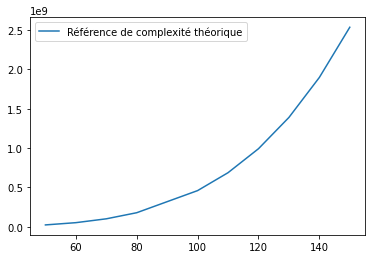

In [131]:
plt.plot(tailles,complexite, label='Référence de complexité théorique')

plt.legend()
plt.savefig('ref 2.C.1.png', dpi=300, bbox_inches='tight')
plt.show()

Analyse expérimentale de la probabilité de succès 

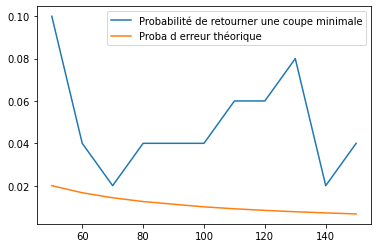

In [174]:
tailles = [50,60,70,80,100,110,120,130,140,150]

plt.plot(tailles,proba1, label='Probabilité de retourner une coupe minimale')
ref = [1/i for i in tailles]

#print(ref)

plt.plot(tailles,ref, label='Proba d erreur théorique')



plt.legend()
plt.savefig('Question 2.C.2.png', dpi=300, bbox_inches='tight')
plt.show()